# DATA 605 -- Final Project 

In [2]:
# import shit
#import math
import numpy as np
import pandas as pd
from IPython.display import display

from scipy.integrate import quad
import scipy.stats

# Astronomy Packages
from astropy import units as u
from astropy import constants as const
from astropy.modeling.models import BlackBody
from astropy.modeling.blackbody import blackbody_lambda, blackbody_nu, BlackBody1D
from astropy.visualization import quantity_support
from astropy.coordinates import SkyCoord

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
from matplotlib import rc
#plt.rc('xtick',labelsize=14)
#plt.rc('ytick',labelsize=12)
#plt.rcParams['lines.linewidth'] = 0.75 #0.5
#plt.rcParams['axes.linewidth'] = 0.75 #0.5
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.minor.size'] = 4

In [3]:
# Defining Physical constants (SI units)
sb = const.sigma_sb
Rsol = const.R_sun
Lsol = const.L_sun
Tsol = 5777.0 # Kelvin

M_Earth = const.M_earth
M_Jup = const.M_jup

In [4]:
df = pd.read_csv("open_exoplanet_catalogue.csv", sep=',') #open_exoplanet_catalogue.csv , sep='\t'
display(df.head(15))
#print(df['hoststar_radius'])
#print(df['hoststar_temperature'])

#x = df.columns[df.isna().any()].tolist()
#print(x)

,name,binaryflag,mass,radius,period,semimajoraxis,eccentricity,periastron,longitude,ascendingnode,...,lastupdate,system_rightascension,system_declination,system_distance,hoststar_mass,hoststar_radius,hoststar_metallicity,hoststar_temperature,hoststar_age,list
0,KOI-1843.03,0,0.00140,0.0540,0.176891,0.00480,NaN,NaN,NaN,NaN,...,13/07/15,19 00 03.1450,+40 13 14.7985,134.833,0.520,0.5000,0.07,3687.0,NaN,Controversial
1,Kepler-974 b,0,NaN,0.1400,4.194497,0.03900,NaN,NaN,NaN,NaN,...,17/11/28,19 00 03.1450,+40 13 14.7985,134.833,0.520,0.5000,0.07,3687.0,NaN,Confirmed planets
2,KOI-1843.02,0,NaN,0.0710,6.356006,0.05200,NaN,NaN,NaN,NaN,...,NaN,19 00 03.1450,+40 13 14.7985,134.833,0.520,0.5000,0.07,3687.0,NaN,Controversial
3,Kepler-9 b,0,0.25000,0.8400,19.224180,0.14300,0.0626,NaN,NaN,NaN,...,15/12/03,19 02 17.7544,+38 24 03.1772,650.000,1.070,1.0200,0.12,5777.0,NaN,Confirmed planets
4,Kepler-9 c,0,0.17000,0.8200,39.031060,0.22900,0.0684,NaN,NaN,NaN,...,15/12/03,19 02 17.7544,+38 24 03.1772,650.000,1.070,1.0200,0.12,5777.0,NaN,Confirmed planets
5,Kepler-9 d,0,0.02200,0.1470,1.592851,0.02710,NaN,NaN,NaN,NaN,...,14/03/10,19 02 17.7544,+38 24 03.1772,650.000,1.070,1.0200,0.12,5777.0,NaN,Confirmed planets
6,GJ 160.2 b,0,0.03209,NaN,5.235400,0.05300,0.0600,360.00,NaN,NaN,...,19/10/10,04 06 34.8414,-20 51 11.2259,25.880,0.690,NaN,NaN,4347.0,NaN,Confirmed planets
7,Kepler-566 b,0,NaN,0.1920,18.427946,NaN,NaN,NaN,NaN,NaN,...,16/05/10,19 26 13.0761,+47 48 52.0533,573.493,0.830,0.7900,-0.01,5132.0,NaN,Confirmed planets
8,WASP-124 b,0,0.60000,1.2400,3.372650,0.04490,NaN,NaN,NaN,NaN,...,16/02/04,22 10 51.4418,-30 44 58.7628,433.000,1.070,NaN,-0.02,6050.0,NaN,Confirmed planets
9,HD 240210 b,0,5.21000,NaN,501.750000,1.33000,0.1500,277.59,NaN,NaN,...,15/11/26,23 10 29.2303,+57 01 46.0277,143.000,0.820,NaN,-0.18,4297.0,NaN,Confirmed planets


# Planet Distributions

In [5]:
#df['system_rightascension']
#df['system_declination']
#print(df['system_rightascension']+' '+df['system_declination'])

#c = SkyCoord('00 42 30 +41 12 00', unit=(u.hourangle, u.deg))_
ra = df['system_rightascension'] #*u.hourangle
dec = df['system_declination'] #*u.hourangle

coord = SkyCoord(ra, dec, unit=(u.hourangle, u.degree), frame='icrs')
#np.radians(coord)
#coord = coord.to('rad')

C:\Users\astro\Anaconda3\lib\site-packages\astropy\units\quantity.py:477: RuntimeWarning: invalid value encountered in remainder
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Text(0.5, 1.0, 'Exoplanet Host Star Systems on Celestial Sphere')

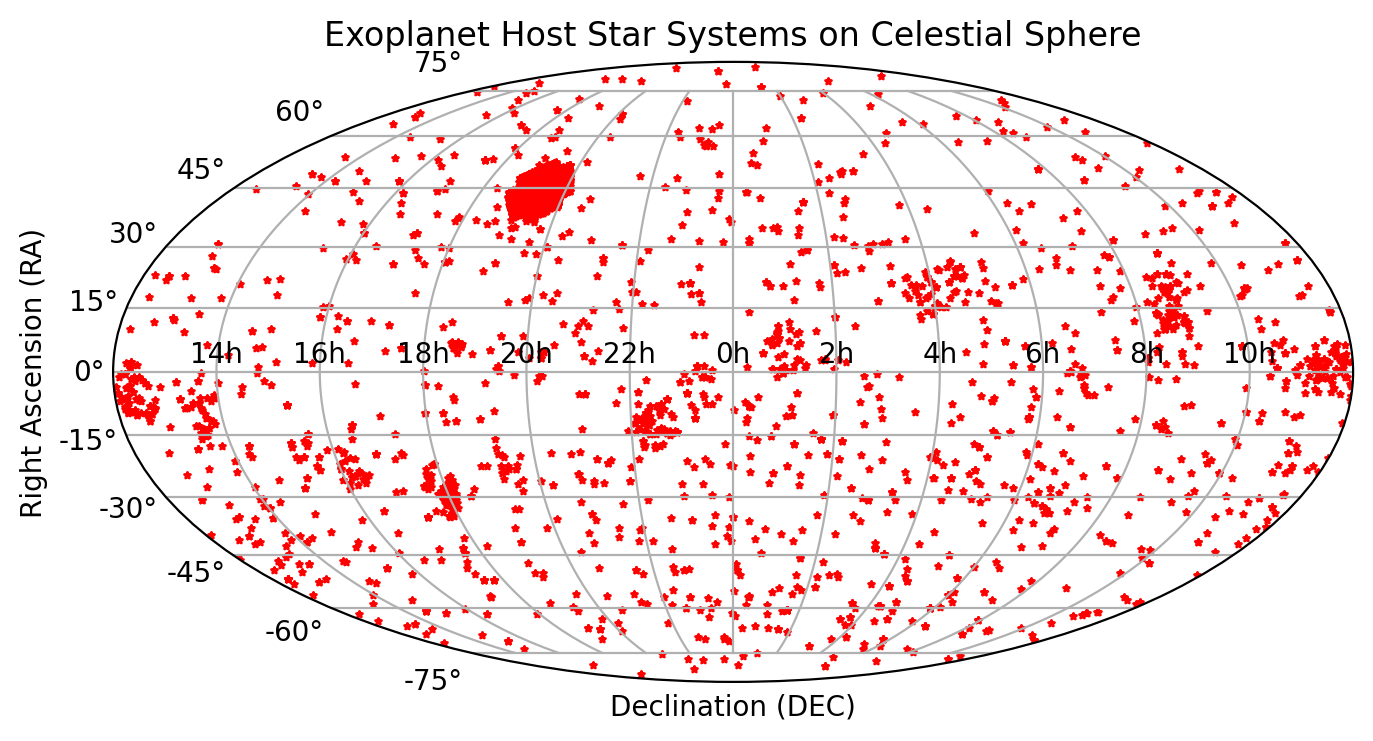

In [6]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(coord.ra.wrap_at('180d').radian, coord.dec.radian, marker = '*', s = 5, color='red')
#ax.scatter(coord)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)
ax.set_xlabel("Declination (DEC)")
ax.set_ylabel("Right Ascension (RA)")
plt.title("Exoplanet Host Star Systems on Celestial Sphere")
#cbar = plt.colorbar(sc, use_gridspec = False, fraction = 0.05, shrink = 0.5, label = 'Redshift')

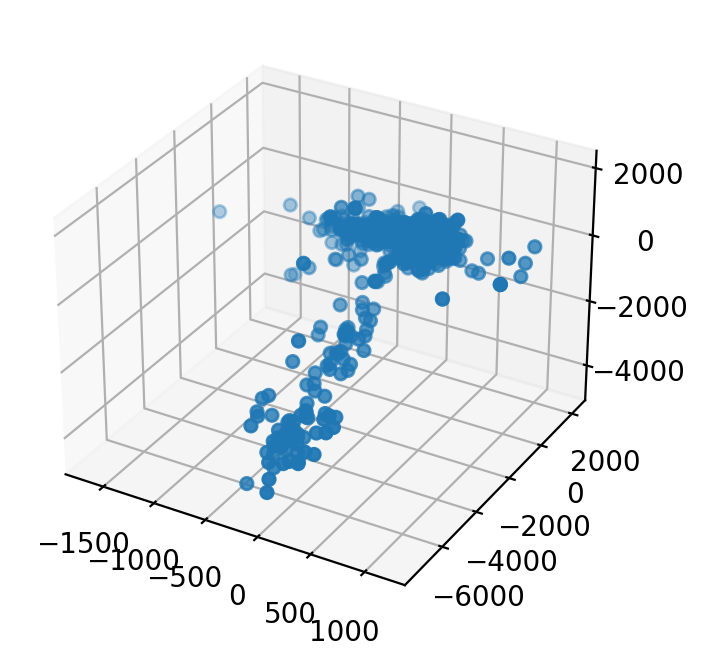

In [374]:
# 3D plot
x = df['system_distance']*np.cos(coord.ra.wrap_at('180d').radian)*np.cos(coord.dec.radian) 
y = df['system_distance']*np.sin(coord.ra.radian)*np.cos(coord.dec.radian)
z = df['system_distance']*np.sin(coord.dec.radian)

#coord.ra.wrap_at('180d').radian
#coord.dec.radian

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

# The Hertzsprung–Russell (HR) Diagram

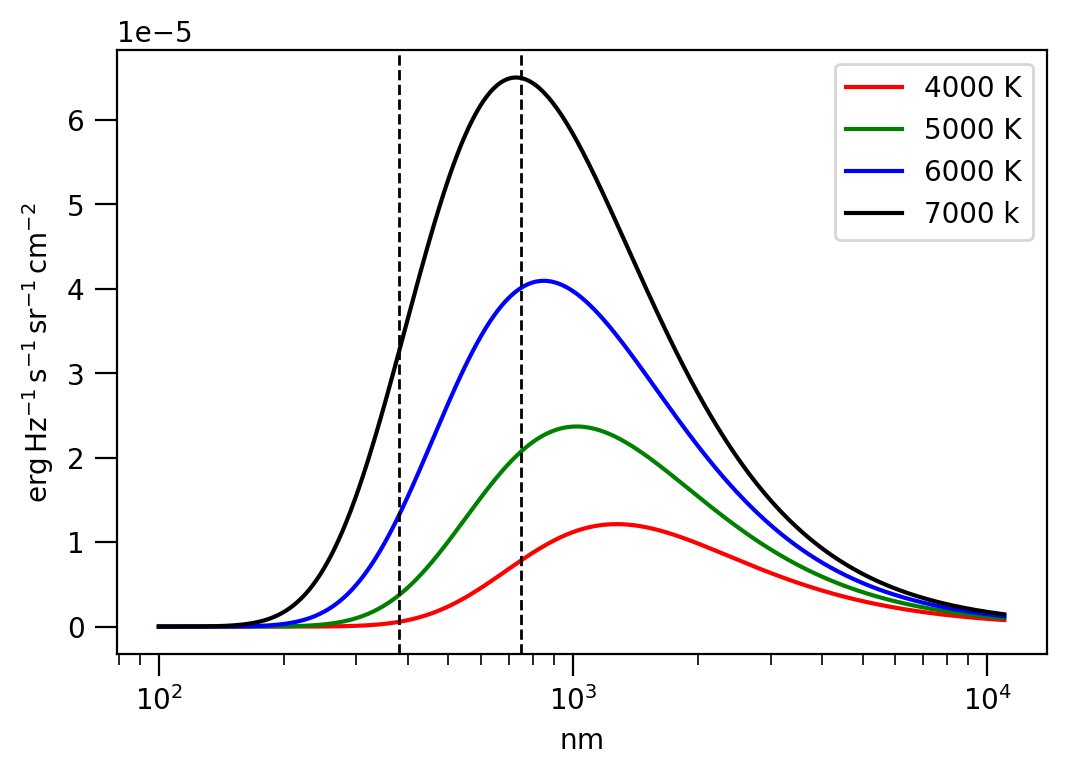

In [391]:
from astropy.modeling.models import BlackBody
from astropy import units as u
from astropy.visualization import quantity_support

bb1 = BlackBody(temperature=4000*u.K)
bb2 = BlackBody(temperature=5000*u.K)
bb3 = BlackBody(temperature=6000*u.K)
bb4 = BlackBody(temperature=7000*u.K)

wav = np.arange(100, 11000) * u.nm #u.AA 1000, 110000
wav2 = wav.to('AA')

flux1 = bb1(wav2)#.to('W sr-1 m−2 Hz−1') W·sr−1·m−2·Hz−1
flux2 = bb2(wav2)
flux3 = bb3(wav2)
flux4 = bb4(wav2)

with quantity_support():
    plt.figure()
    plt.semilogx(wav, flux1, color = 'red' , label = '4000 K')
    plt.semilogx(wav, flux2,color = 'green' , label = '5000 K')
    plt.semilogx(wav, flux3, color = 'blue' ,label = '6000 K')
    plt.semilogx(wav, flux4,color = 'black' , label = '7000 k')
    plt.axvline(380*u.nm, color = 'black', linestyle='--', linewidth = 1.0)
    plt.axvline(750*u.nm, color = 'black', linestyle='--', linewidth = 1.0)
    plt.legend()
    plt.show()

<ipython-input-7-325d91744719>:8: RuntimeWarning: overflow encountered in exp
  intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )


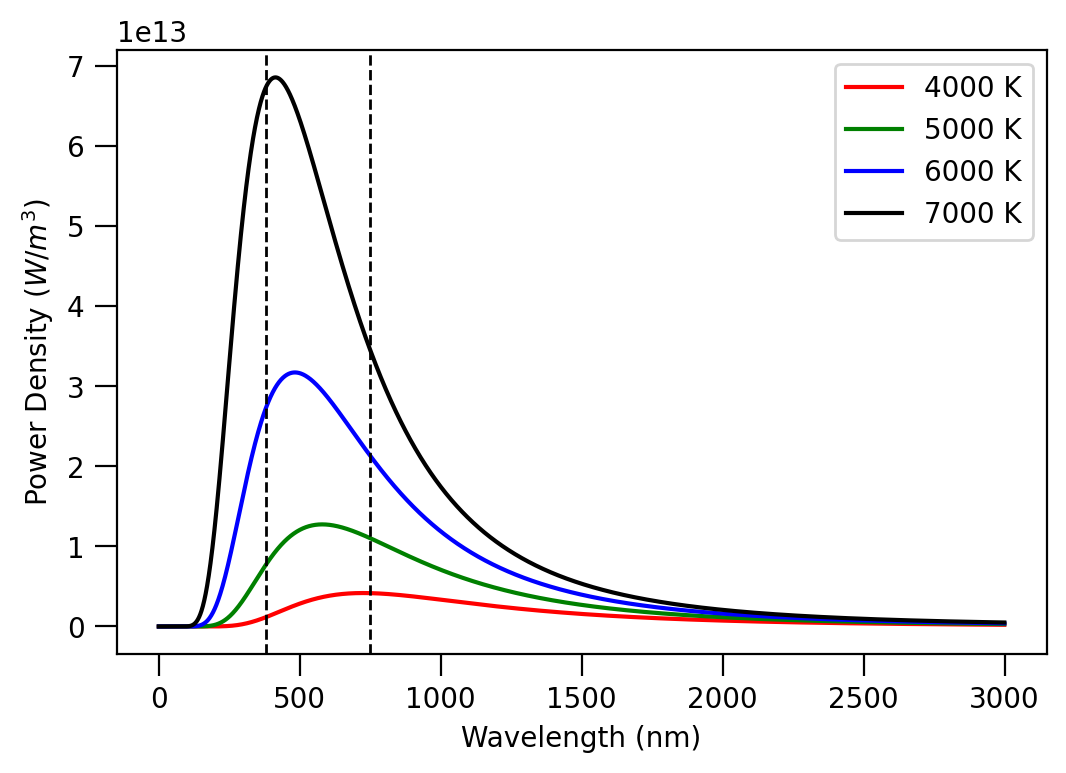

In [7]:
h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

def planck(wav, T):
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )
    return intensity

# generate x-axis in increments from 1nm to 3 micrometer in 1 nm increments
# starting at 1 nm to avoid wav = 0, which would result in division by zero.
wavelengths = np.arange(1e-9, 3e-6, 1e-9) 

# intensity at 4000K, 5000K, 6000K, 7000K
intensity4000 = planck(wavelengths, 4000.0)
intensity5000 = planck(wavelengths, 5000.0)
intensity6000 = planck(wavelengths, 6000.0)
intensity7000 = planck(wavelengths, 7000.0)


plt.plot(wavelengths*1e9, intensity4000, 'r-', label = '4000 K') 
# plot intensity4000 versus wavelength in nm as a red line
plt.plot(wavelengths*1e9, intensity5000, 'g-', label = '5000 K') # 5000K green line
plt.plot(wavelengths*1e9, intensity6000, 'b-', label = '6000 K') # 6000K blue line
plt.plot(wavelengths*1e9, intensity7000, 'k-', label = '7000 K') # 7000K black line

plt.axvline(380, color = 'black', linestyle='--', linewidth = 1.0)
plt.axvline(750, color = 'black', linestyle='--', linewidth = 1.0)

plt.xlabel('Wavelength (nm)')
plt.ylabel(r'Power Density ($W/m^3$)')

plt.legend()

In [8]:
HR_df = df[["hoststar_temperature", "hoststar_radius"]]
HR_df = HR_df.dropna()
HR_df = HR_df.reset_index(drop=True)
#HR_df.dropna(subset = ["hoststar_temperature","hoststar_radius"], inplace = True)
#HR_df.reset_index(drop = True, inplace = True)

#df.dropna(subset = ["hoststar_temperature","hoststar_radius"], inplace = True)
#df.reset_index(drop = True, inplace = True)

In [9]:
def compute_stellar_luminosity(dataframe):
    nu = np.linspace(1.0, 3000.0, 1000) * u.THz
    #Lum = np.asarray([])
    Lum = []

    for i in range(0,len(dataframe)):
        #print(i)
        Teff = dataframe['hoststar_temperature'][i]
        radius = dataframe['hoststar_radius'][i]*Rsol

        bb_nu = blackbody_nu(in_x=nu, temperature = Teff*u.K)
        bb_nu_int = np.trapz(x = nu, y = bb_nu).to('J s-1 m−2 sr−1')
        Lum.append((4*np.pi*radius.value**2)*bb_nu_int.value) #q.value
        #Lum = np.append(Lum, (4*np.pi*radius**2)*result)

    return np.asarray(Lum)/Lsol.value

#df['hoststar_luminosity'] = Lum

#bb5000K_nu = blackbody_nu(in_x=nu, temperature=5000. * u.Kelvin)

In [10]:
HR_df['hoststar_luminosity'] = compute_stellar_luminosity(HR_df)
HR_df

,hoststar_temperature,hoststar_radius,hoststar_luminosity
0,3687.0,0.50,0.013249
1,3687.0,0.50,0.013249
2,3687.0,0.50,0.013249
3,5777.0,1.02,0.332318
4,5777.0,1.02,0.332318
...,...,...,...
3831,4528.0,14.30,24.651390
3832,4528.0,14.30,24.651390
3833,5407.0,1.22,0.364829
3834,5407.0,1.22,0.364829


In [ ]:
# Area of a gaussian is 2*pi*a*b
angular_area = 2*np.pi*(25*u.arcsec*30*u.arcsec)
distance = 3.4*u.kpc
# Convert the angles to radians and treat them as unitless
physical_area = (angular_area*distance**2).to(u.cm**2, u.dimensionless_angles())
#physical_area = (angular_area_in_arcseconds / arcsec_per_radian**2) * distance_in_cm**2
print("Source area: ",physical_area," and effective physical radius: ", (physical_area**0.5).to(u.pc))

luminosity = integrated_sed * physical_area
print(luminosity.to(u.L_sun))

In [ ]:
# HR diagram
#plt.plot(df['hoststar_temperature'])


Text(5377.0, 0.6000000000000001, 'The Sun')

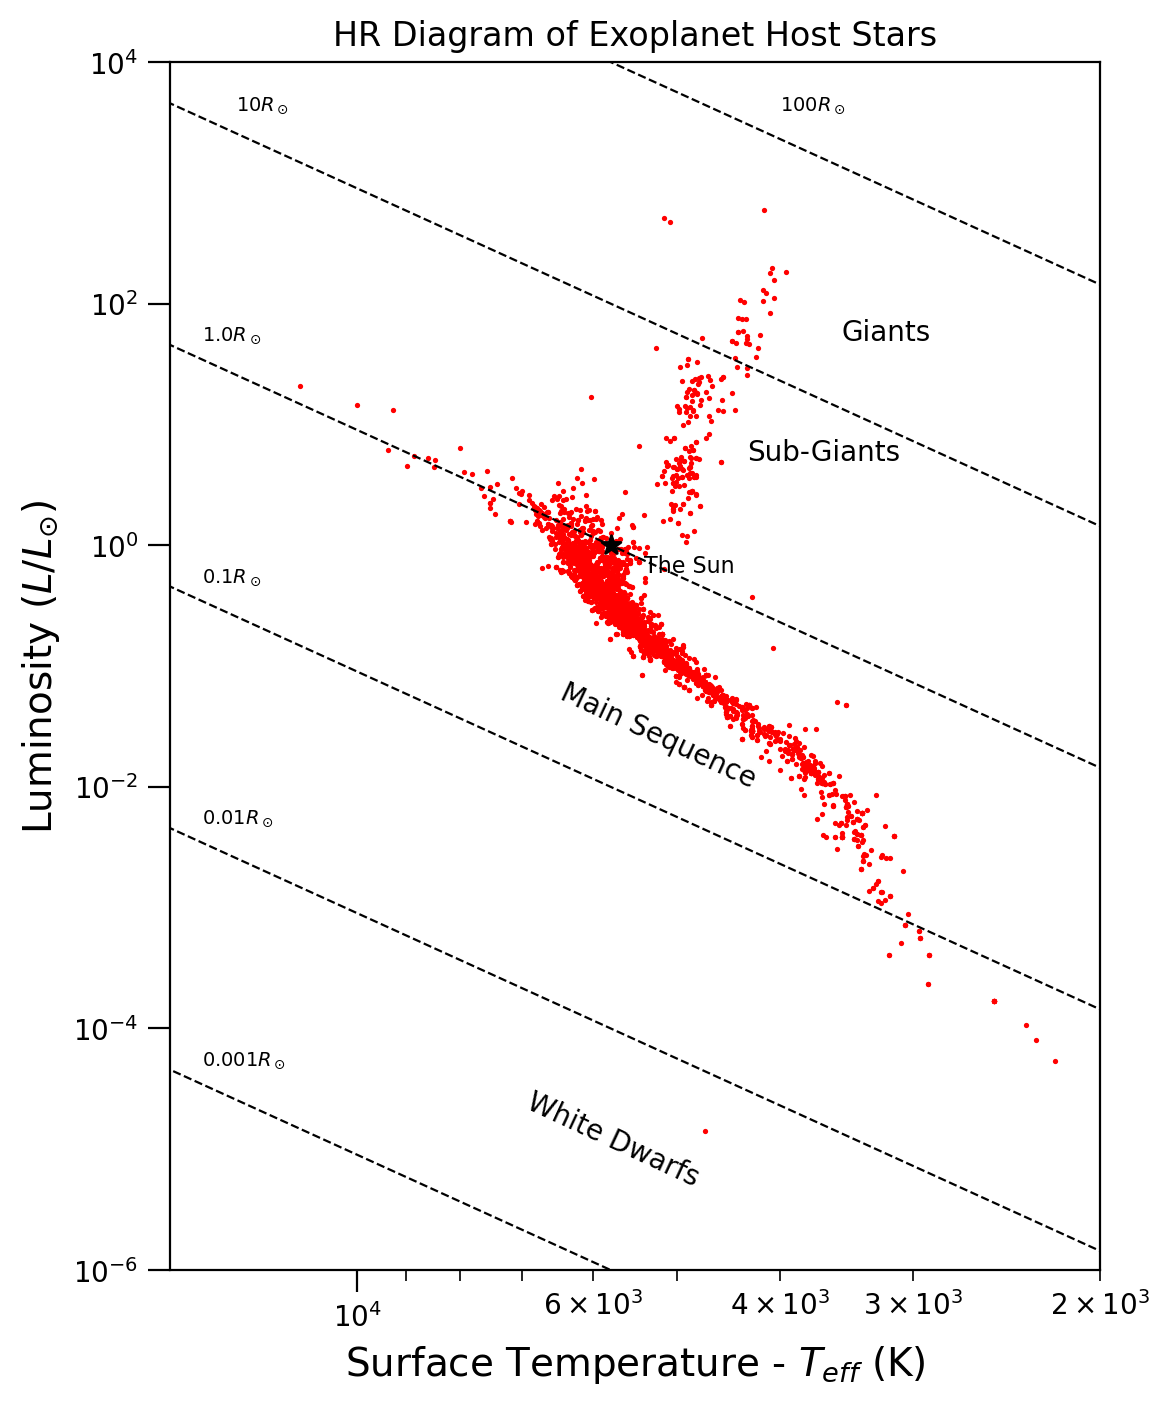

In [26]:
plt.figure(figsize=(6,8))
T = np.linspace(1000,50000,1000) # K
R = np.array([0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0])# # m

for i in range(0,len(R)):
    #L = (4*np.pi*(R[i]*Rsol)**2*sb*T**4)/Lsol
    L = (R[i]**2)*((T/Tsol)**4)#*Lsol
    plt.plot(T, L, color = 'black', linestyle = '--', linewidth = 0.8)

plt.scatter(HR_df['hoststar_temperature'], HR_df['hoststar_luminosity'], s = 0.8, color = 'red')
plt.scatter(Tsol,1,color = 'black', marker = '*', s = 50)

plt.yscale('log')
plt.xscale('log')
#ax.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.ylim(10**-6,10**4)
plt.xlim(2000,15000)
plt.gca().invert_xaxis()

plt.title('HR Diagram of Exoplanet Host Stars')
plt.xlabel(r'Surface Temperature - $T_{eff}$ (K)', fontsize = 14)
plt.ylabel(r'Luminosity ($L/L_{\odot}$)', fontsize = 14)

plt.text(14000, 5*10**-5, r'$0.001 R_\odot$', fontsize = 7)
plt.text(14000, 5*10**-3, r'$0.01 R_\odot$', fontsize = 7)
plt.text(14000, 5*10**-1, r'$0.1 R_\odot$', fontsize = 7)
plt.text(14000, 5*10**1, r'$1.0 R_\odot$', fontsize = 7)
plt.text(13000, 4*10**3, r'$10 R_\odot$', fontsize = 7)
plt.text(4*10**3, 4*10**3, r'$100 R_\odot$', fontsize = 7)
#plt.text(4000, 4*10**5, r'$1000 R_\odot$', fontsize = 7)

plt.text(7000, 5*10**-6, r'White Dwarfs', fontsize = 10, rotation=-25)
plt.text(6.5*10**3, 1*10**-2, r'Main Sequence', fontsize = 10, rotation=-25)
plt.text(4300, 5*10**0, r'Sub-Giants', fontsize = 10, rotation=0)
plt.text(3500, 5*10**1, r'Giants', fontsize = 10, rotation=0)
plt.text(Tsol-400, 6*10**-1, r'The Sun', fontsize = 8, rotation=0)

# Minimum-Mass in relation to Semi-Major Axis

Text(0, 0.5, 'Mass $(Jupiter)$')

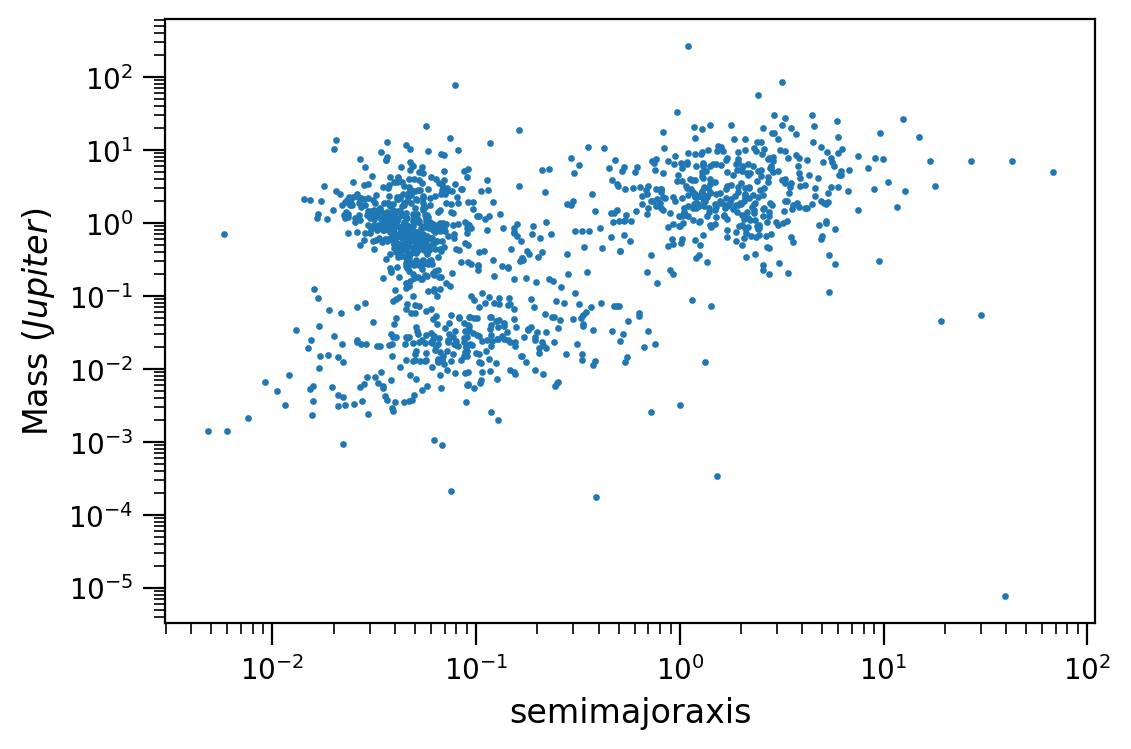

In [259]:
plt.scatter(df['semimajoraxis'],df['mass'], s = 2)


plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'semimajoraxis', fontsize = 12)
plt.ylabel(r'Mass $(Jupiter)$', fontsize = 12)

In [ ]:
# Orbital period vs semi-major axis


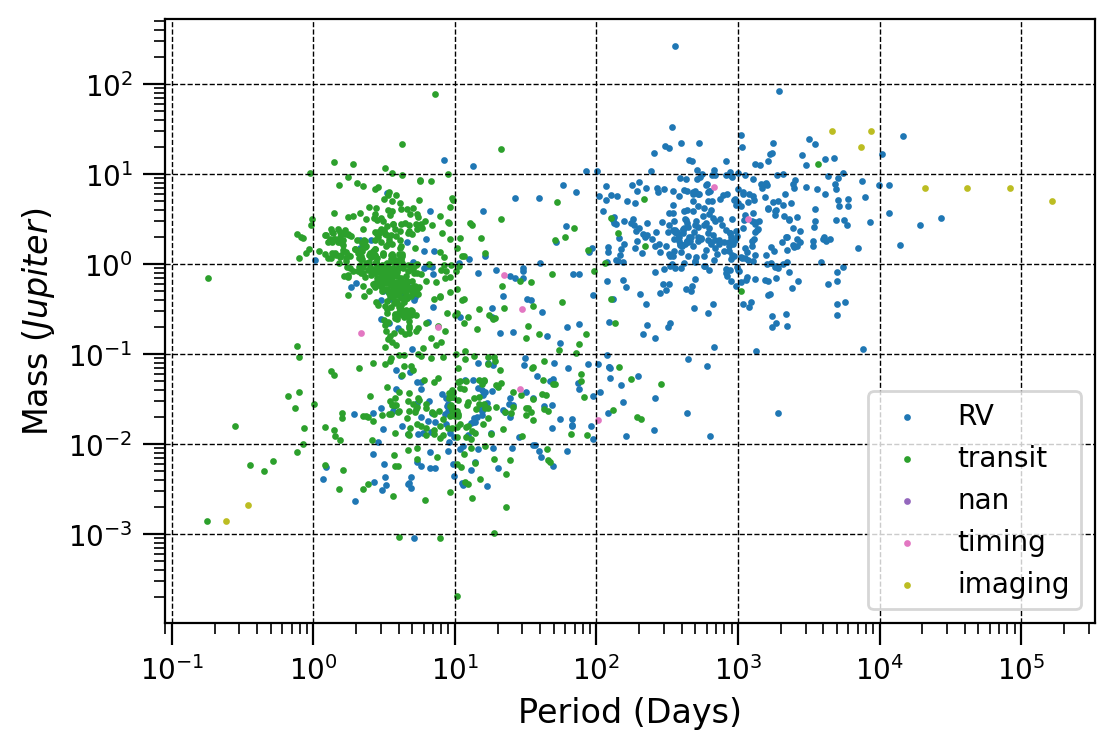

In [257]:
# Period Vs Mass
import matplotlib.colors as colors
import matplotlib.cm as cmx
#new_df = df[df['period'].notnull()]

#df.dropna(subset = ["period","mass","discoverymethod"], inplace = True)
#df.reset_index(drop = True, inplace = True)
#rint(new_df)

uniq = list(set(df['discoverymethod']))

z = range(1,len(uniq))
hot = plt.get_cmap('tab10') # hot nipy_spectral
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)
#scalarMap = plt.get_cmap('tab10')

#plt.scatter(df['period'], df['mass'], s = 0.5)
#colors = ['red','blue', 'green', 'orange']

for i in range(len(uniq)):
    indx = df['discoverymethod'] == uniq[i]
    plt.scatter(df['period'][indx], df['mass'][indx], s=2.0, color=scalarMap.to_rgba(i), label=uniq[i]) #scalarMap.to_rgba(i)

plt.yscale('log')
plt.xscale('log')

plt.xlabel(r'Period (Days)', fontsize = 12)
plt.ylabel(r'Mass $(Jupiter)$', fontsize = 12)
plt.legend(loc = 'lower right')
plt.grid(color='black', linestyle='--', linewidth=0.5)

In [27]:
## Habitbaility ##
hab_df = df[["mass", "semimajoraxis", "hoststar_temperature", "hoststar_radius"]]
hab_df = hab_df.dropna()
hab_df = hab_df.reset_index(drop=True)
hab_df['hoststar_luminosity'] = compute_stellar_luminosity(hab_df)
hab_df['mass'] = hab_df['mass']/(const.M_earth/const.M_jup)
hab_df

,mass,semimajoraxis,hoststar_temperature,hoststar_radius,hoststar_luminosity
0,0.444960,0.0048,3687.0,0.500,0.013249
1,79.457102,0.1430,5777.0,1.020,0.332318
2,54.030829,0.2290,5777.0,1.020,0.332318
3,6.992225,0.0271,5777.0,1.020,0.332318
4,178.301736,0.0681,6110.0,2.010,1.614733
...,...,...,...,...,...
1272,1057.732937,0.0677,6442.0,1.535,1.163706
1273,781.857880,1.2700,4528.0,14.300,24.651390
1274,1004.337765,1.9300,4528.0,14.300,24.651390
1275,432.246633,1.0510,5407.0,1.220,0.364829


An approximation of the inner boundry is
$$ r_i = \sqrt{\frac{L_{\star}}{1.1}} $$
and the outer boundry is given by
$$ r_{o} = \sqrt{\frac{L_{\star}}{0.53}}$$
in units of AUs.

based on 

Kasting, James; Whitmire, Daniel; and Reynolds, Ray (1993). Habitable zones around main sequence stars. Icarus 101: 108-128.
https://ui.adsabs.harvard.edu/abs/1993Icar..101..108K/abstract

Whitmire, Daniel; Reynolds, Ray, (1996). Circumstellar habitable zones: astronomical considerations. In: Doyle, Laurence (ed.). Circumstellar Habitable Zones, 117-142. Travis House Publications, Menlo Park.

In [28]:
# compute habiliability zone
ri = np.sqrt(hab_df['hoststar_luminosity']/1.1) # inner boundary
ro = np.sqrt(hab_df['hoststar_luminosity']/0.53) # outer boundary 
rc = (ri+ro)/2 # midpoint

HZD = hab_df['semimajoraxis'] - rc

In [48]:
#hab_df['HZD'] = HZD
len(hab_df[(hab_df['HZD']<1) & (hab_df['HZD']>-1) & (hab_df['mass']<10) & (hab_df['mass']>0.75)])
len(hab_df[(hab_df['HZD']<0.1) & (hab_df['HZD']>-0.1) & (hab_df['mass']<10) & (hab_df['mass']>0.75)])

73

Text(-4.5, 1.5, 'Earth')

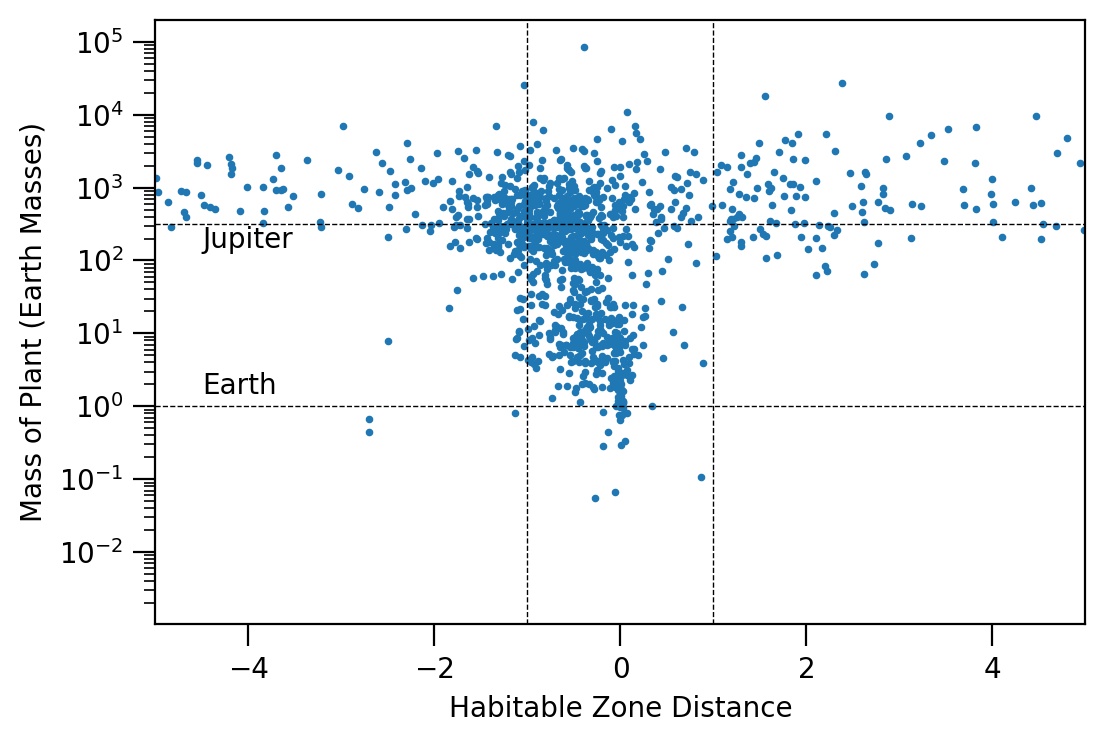

In [45]:
from matplotlib.patches import Ellipse

Ellipse1 = Ellipse((0, 5), width=1.0, height=5.0, color='r', fill=False)

fig, ax = plt.subplots()

ax.scatter(HZD, hab_df['mass'], s=3)
ax.axvline(x = -1.0, color = 'black', linestyle = '--', linewidth = 0.5)
ax.axvline(x = 1.0, color = 'black', linestyle = '--', linewidth = 0.5)
ax.axhline(y = 1, color = 'black', linestyle = '--', linewidth = 0.5)
ax.axhline(y = 318, color = 'black', linestyle = '--', linewidth = 0.5)
#ax.axhline(y = 0.5, color = 'black', linestyle = ':', linewidth = 1.0)
#ax.axhline(y = 10, color = 'black', linestyle = ':', linewidth = 1.0)
#ax.add_patch(Ellipse1)
ax.set_yscale('log')
ax.set_ylabel('Mass of Plant (Earth Masses)')
ax.set_xlabel('Habitable Zone Distance')
ax.set_xlim(-5,5)



plt.text(-4.5, 150, r'Jupiter', fontsize = 10)
plt.text(-4.5, 1.5, r'Earth', fontsize = 10)

Fogg, Martyn J., (1992). An estimate of the prevalence of biocompatible and habitable planets. Journal of the British Interplanetary Society, 45: 3-12.

Habets, G.M.H.J.; Heintze, J.R.W., (1981). Empirical bolometric corrections for the main sequence. Astron. Astrophys. Suppl. Ser. 46: 193-237.



Kasting, James F. (1996). Habitable zones around stars: An update. In: Doyle, Laurence (ed.). Circumstellar Habitable Zones, 117-142. Travis House Publications, Menlo Park.

Lang, Kenneth (1992). Astrophysical Data: Planets and Stars. Springer-Verlag, New York.



(array([nan]),
 array([nan, nan]),
 [<matplotlib.patches.Polygon at 0x214c25e0e80>])

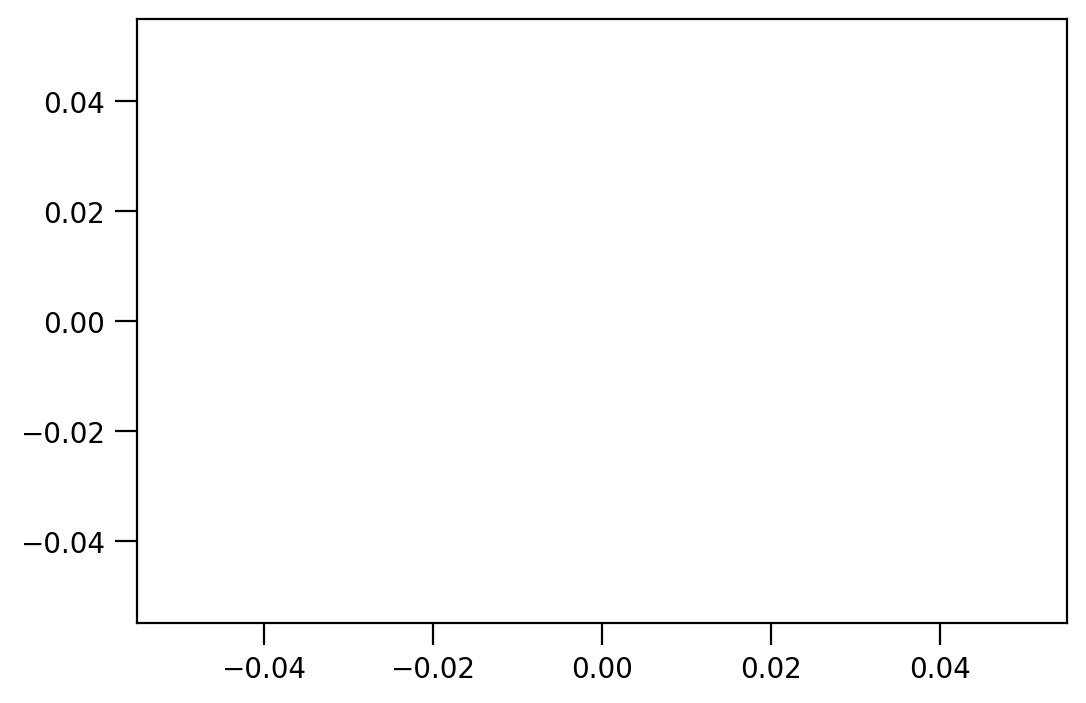

In [223]:
# Histograms
#new_df = df.dropna(subset = ["temperature"], inplace = True)
#new_df.reset_index(drop = True, inplace = True)

from astropy.visualization import hist
hist(df['temperature'], bins='scott', histtype='stepfilled', alpha=0.2, density=True)